# Part 3 ‐ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.

The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.

1) What fraction of the observed users were retained?

- It would appear that active users have more aof a spread over whether they ride with a surge price. Inactive users are either all or nothing when riding with surge pricing.
- As for the driver rating by users, the inactive users have a much larger spread of rating than the active ones. This varying degree of rating could have lead them to stop using.
- About 37.6% of users are still active.

2) Build a predictive model to help Ultimate determine whether or not a user will be active in
their 6th month on the system. How valid is your model? Include any key
indicators of model performance.

I used a linear regression classification model to determine whether users were either active or not active. The model had a good accuracy with 70.3%, a recall of 65.9%, and a not very good precition value of 44.3%. 


3) Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long term rider retention (again, a few sentences will suffice).

This model give a decent predition into whether a customer will remain active or not. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

In [2]:
df = pd.read_json('ultimate_data_challenge.json')
df = pd.DataFrame(df)
df

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [4]:
# filling missing data with mean value in avg_rating_of_driver and avg_rating_by_driver
mean_value = df['avg_rating_of_driver'].mean()
df['avg_rating_of_driver'].fillna(value=mean_value, inplace=True)

mean_value2 = df['avg_rating_by_driver'].mean()
df['avg_rating_by_driver'].fillna(value=mean_value2, inplace=True)

df.count()

city                      50000
trips_in_first_30_days    50000
signup_date               50000
avg_rating_of_driver      50000
avg_surge                 50000
last_trip_date            50000
phone                     49604
surge_pct                 50000
ultimate_black_user       50000
weekday_pct               50000
avg_dist                  50000
avg_rating_by_driver      50000
dtype: int64

In [5]:
# convert to datetime
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

# add current date
df['current_date'] = pd.to_datetime('2014-07-01')

# days from signup to last trip
df['signup_to_last_trip'] = (df['last_trip_date'] - df['signup_date']).dt.days

# days from last trip to current day (2014-07-01)
df['day_since_trip'] = (df['current_date'] - df['last_trip_date']).dt.days
df

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,current_date,signup_to_last_trip,day_since_trip
0,King's Landing,4,2014-01-25,4.700000,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,2014-07-01,143,14
1,Astapor,0,2014-01-29,5.000000,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,2014-07-01,96,57
2,Astapor,3,2014-01-06,4.300000,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,2014-07-01,1,175
3,King's Landing,9,2014-01-10,4.600000,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,2014-07-01,170,2
4,Winterfell,14,2014-01-27,4.400000,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,2014-07-01,47,108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.000000,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2,2014-07-01,131,26
49996,Astapor,1,2014-01-24,4.601559,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0,2014-07-01,1,157
49997,Winterfell,0,2014-01-31,5.000000,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0,2014-07-01,111,40
49998,Astapor,2,2014-01-14,3.000000,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5,2014-07-01,1,167


In [6]:
df['active_1'] = np.where(df['day_since_trip'] <= 30, 1, 0)
df

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,current_date,signup_to_last_trip,day_since_trip,active_1
0,King's Landing,4,2014-01-25,4.700000,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,2014-07-01,143,14,1
1,Astapor,0,2014-01-29,5.000000,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,2014-07-01,96,57,0
2,Astapor,3,2014-01-06,4.300000,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,2014-07-01,1,175,0
3,King's Landing,9,2014-01-10,4.600000,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,2014-07-01,170,2,1
4,Winterfell,14,2014-01-27,4.400000,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,2014-07-01,47,108,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.000000,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2,2014-07-01,131,26,1
49996,Astapor,1,2014-01-24,4.601559,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0,2014-07-01,1,157,0
49997,Winterfell,0,2014-01-31,5.000000,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0,2014-07-01,111,40,0
49998,Astapor,2,2014-01-14,3.000000,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5,2014-07-01,1,167,0


In [7]:
# number of users still active after 6 months
df['active_1'].sum()/len(df)*100

37.608000000000004

In [8]:
active = df[df['active_1']==1]
inactive = df[df['active_1']!=1]

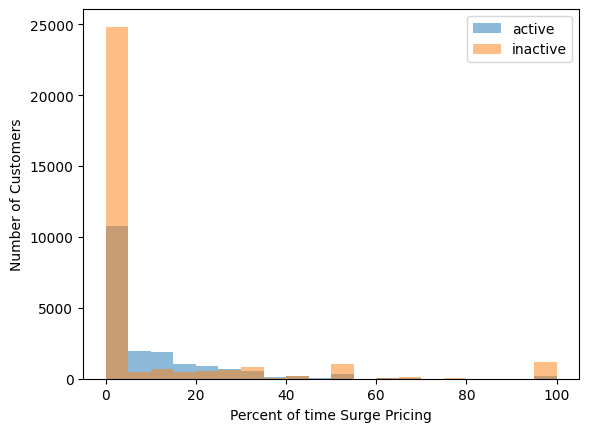

In [9]:
plt.hist(active['surge_pct'], bins=20, alpha=0.5, label='active')
plt.hist(inactive['surge_pct'], bins=20, alpha=0.5, label='inactive')
plt.xlabel('Percent of time Surge Pricing')
plt.ylabel('Number of Customers')
plt.legend(loc='upper right')
plt.show()

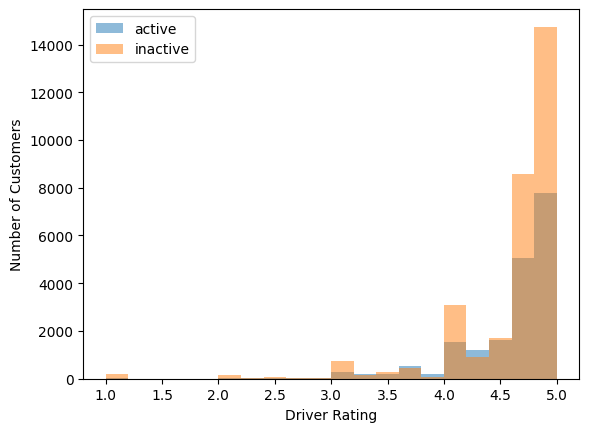

In [10]:
plt.hist(active['avg_rating_of_driver'], bins=20, alpha=0.5, label='active')
plt.hist(inactive['avg_rating_of_driver'], bins=20, alpha=0.5, label='inactive')
plt.xlabel('Driver Rating')
plt.ylabel('Number of Customers')
plt.legend(loc='upper left')
plt.show()

In [11]:
# dropping phone column because of missing values and not useful
df = df.drop(['phone','signup_date','last_trip_date','current_date',
              'day_since_trip','signup_to_last_trip'], axis=1)

#convert T/F to 1/0
df["ultimate_black_user"] = df["ultimate_black_user"].astype(int)

df.count()

city                      50000
trips_in_first_30_days    50000
avg_rating_of_driver      50000
avg_surge                 50000
surge_pct                 50000
ultimate_black_user       50000
weekday_pct               50000
avg_dist                  50000
avg_rating_by_driver      50000
active_1                  50000
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   avg_rating_of_driver    50000 non-null  float64
 3   avg_surge               50000 non-null  float64
 4   surge_pct               50000 non-null  float64
 5   ultimate_black_user     50000 non-null  int64  
 6   weekday_pct             50000 non-null  float64
 7   avg_dist                50000 non-null  float64
 8   avg_rating_by_driver    50000 non-null  float64
 9   active_1                50000 non-null  int64  
dtypes: float64(6), int64(3), object(1)
memory usage: 3.8+ MB


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [14]:
features = df.columns.drop('active_1')

X = df[features]
y = df['active_1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = pd.DataFrame(X_train.reset_index(drop=True))
X_test = pd.DataFrame(X_test.reset_index(drop=True))
y_train = pd.DataFrame(y_train.reset_index(drop=True))
y_test = pd.DataFrame(y_test.reset_index(drop=True))

In [15]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(40000, 9)
(40000, 1)
(10000, 9)
(10000, 1)


In [16]:
# One Hot Encoder on train and test set

cols = list(X_train['city'].unique())

X_train_ohe = pd.DataFrame(X_train)

# Create an instance of One-hot-encoder
ohe = OneHotEncoder()

X_train_ohe = pd.DataFrame(ohe.fit_transform(X_train_ohe[['city']]).toarray())

# Change column names
X_train_ohe.columns = cols

#Merge with main
X_train = pd.concat([X_train, X_train_ohe], axis=1)

X_train = X_train.drop('city', axis=1)

In [17]:
X_test_ohe = pd.DataFrame(X_test)

X_test_ohe = pd.DataFrame(ohe.transform(X_test_ohe[['city']]).toarray())

# Change column names
X_test_ohe.columns = cols

#Merge with main
X_test = pd.concat([X_test, X_test_ohe], axis=1)

X_test = X_test.drop('city', axis=1)

In [18]:
# Scaling data

# define min max scaler
scaler = MinMaxScaler()

# transform data in X_train
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)

X_train

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,Winterfell,Astapor,King's Landing
0,0.008,1.00,0.0,0.0,1.0,1.0,0.009931,1.000,0.0,0.0,1.0
1,0.008,1.00,0.0,0.0,0.0,1.0,0.054739,0.875,0.0,0.0,1.0
2,0.016,1.00,0.0,0.0,1.0,1.0,0.008238,1.000,0.0,0.0,1.0
3,0.032,1.00,0.0,0.0,1.0,1.0,0.073755,1.000,1.0,0.0,0.0
4,0.008,1.00,0.0,0.0,0.0,1.0,0.309801,1.000,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
39995,0.008,0.75,0.0,0.0,0.0,1.0,0.030949,1.000,0.0,0.0,1.0
39996,0.016,1.00,0.0,0.0,1.0,1.0,0.073986,1.000,0.0,1.0,0.0
39997,0.016,1.00,0.0,0.0,0.0,0.0,0.043267,0.875,0.0,0.0,1.0
39998,0.000,1.00,0.0,0.0,0.0,1.0,0.278697,1.000,0.0,0.0,1.0


In [19]:
# Transforming the X_test set according to the X_train fit
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,Winterfell,Astapor,King's Landing
0,0.008,0.70000,0.000000,0.000,1.0,0.600,0.026330,0.925,0.0,0.0,1.0
1,0.000,0.95000,0.000000,0.000,1.0,0.750,0.024713,1.000,1.0,0.0,0.0
2,0.000,1.00000,0.000000,0.000,0.0,1.000,0.035261,1.000,0.0,0.0,1.0
3,0.016,1.00000,0.071429,0.500,0.0,0.000,0.022635,1.000,1.0,0.0,0.0
4,0.000,0.95000,0.004286,0.111,0.0,0.556,0.021095,0.950,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.008,1.00000,0.000000,0.000,1.0,0.000,0.026407,1.000,0.0,0.0,1.0
9996,0.008,0.90039,0.035714,1.000,0.0,0.000,0.010393,1.000,1.0,0.0,0.0
9997,0.008,0.75000,0.000000,0.000,0.0,0.000,0.116252,1.000,0.0,0.0,1.0
9998,0.072,0.97500,0.004286,0.037,1.0,0.841,0.014705,0.900,1.0,0.0,0.0


In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
classifier = LogisticRegression(random_state = 42)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

/Users/pat/miniconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

print ("Confusion Matrix : \n", cm)

print("\n")
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

Confusion Matrix : 
 [[5351  868]
 [2107 1674]]


True Positive(TP)  =  1674
False Positive(FP) =  868
True Negative(TN)  =  5351
False Negative(FN) =  2107


In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

accuracy = accuracy_score(y_pred, y_test)
precision = precision_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)

print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))
print('Precision of the binary classifier = {:0.3f}'.format(precision))
print('Recall of the binary classifier = {:0.3f}'.format(recall))


Accuracy of the binary classifier = 0.703
Precision of the binary classifier = 0.443
Recall of the binary classifier = 0.659
